In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [21]:
rawloads = pd.read_csv(
    'Inputs\WR Pontprennau (2100040811883_Main Electricity Meter) 2019-01-01_2020-12-14.csv',
    usecols=['DateTime', 'kWh'],
    parse_dates=['DateTime'], dayfirst=True)
stDay = dt.datetime(2019, 12, 14)
endDay = stDay + dt.timedelta(days=367)
rawloads = rawloads[(rawloads['DateTime'] >= stDay) & (rawloads['DateTime'] < endDay)]
rawloads = rawloads[rawloads['DateTime'].dt.date != dt.date(2020, 2, 29)]
rawloads['Month'] = rawloads['DateTime'].dt.month
rawloads['Day'] = rawloads['DateTime'].dt.day
rawloads['Year'] = 2021
rawloads['Time'] = rawloads['DateTime'].dt.time
rawloads['newDT'] = pd.to_datetime(
    rawloads['Year'].astype(str)+'-'+rawloads['Month'].astype(str)+'-'
    +rawloads['Day'].astype(str)+' '+rawloads['Time'].astype(str))
rawloads.drop(columns=['DateTime', 'Month', 'Day', 'Year'], inplace=True)
meanDay = rawloads.groupby('Time').agg({'kWh': 'mean'})
# rawloads = rawloads.merge(meanDay, left_on='Time', right_index=True).sort_values(by='newDT')
# rawloads.rename(columns={'kWh_y': 'kWh', 'newDT': 'DateTime'}, inplace=True)
# rawloads[['DateTime', 'kWh']].to_csv('Inputs/457_meter_2021.csv')
# rawloads

In [22]:
meanDay

,kWh
Time,
00:00:00,74.163288
00:30:00,73.757808
01:00:00,74.485206
01:30:00,73.896164
02:00:00,74.900000
02:30:00,75.681370
03:00:00,75.290685
03:30:00,75.982740
04:00:00,79.459726


In [23]:
df = pd.DataFrame(pd.date_range(start='2021/1/1', end='2022/1/2', freq='30min'), columns=['DateTime'])
df['Time'] = df['DateTime'].dt.time
df = df.merge(meanDay, left_on='Time', right_index=True).sort_values(by='DateTime')
df[['DateTime', 'kWh']].to_csv('Inputs/457_meter_2021.csv')

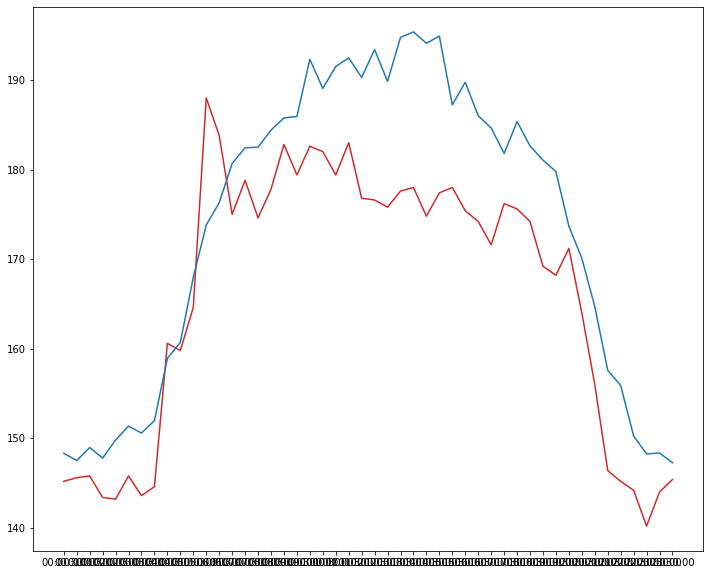

In [24]:
dayloads = rawloads[rawloads['newDT'].dt.date == dt.date(2021, 4, 20)]

fig, axs = plt.subplots(
    1,
    figsize=(12, 10),
    sharex=True,
    gridspec_kw={'hspace': 0.1})

axs.plot(
    dayloads['Time'].astype(str),
    dayloads['kWh']*2, color='tab:red',
    )
axs.plot(
    meanDay.index.astype(str),
    meanDay['kWh']*2,
    )
fig.show()

In [25]:
rawloads

,kWh,Time,newDT
16656,75.800003,00:00:00,2021-12-14 00:00:00
16657,75.199997,00:30:00,2021-12-14 00:30:00
16658,73.500000,01:00:00,2021-12-14 01:00:00
16659,74.099998,01:30:00,2021-12-14 01:30:00
16660,75.900002,02:00:00,2021-12-14 02:00:00
...,...,...,...
34219,71.800003,21:30:00,2021-12-13 21:30:00
34220,70.500000,22:00:00,2021-12-13 22:00:00
34221,71.900002,22:30:00,2021-12-13 22:30:00
34222,71.300003,23:00:00,2021-12-13 23:00:00
